[2025/01/22 12:02:49] ppocr DEBUG: Namespace(alpha=1.0, alphacolor=(255, 255, 255), benchmark=False, beta=1.0, binarize=False, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='C:\\Users\\parth/.paddleocr/whl\\cls\\ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_box_type='quad', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='C:\\Users\\parth/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=None,

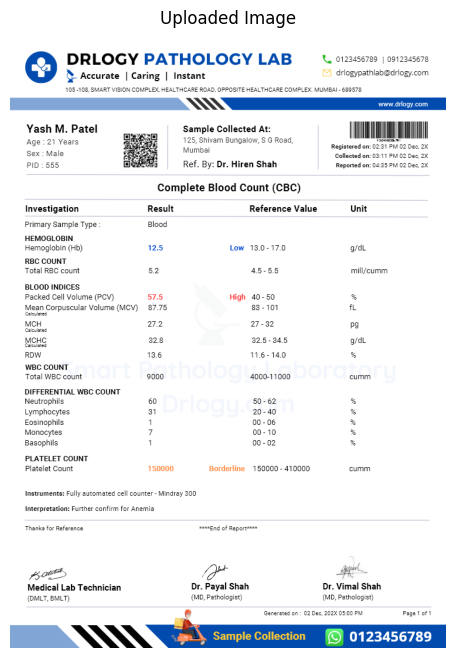

[2025/01/22 12:02:53] ppocr DEBUG: dt_boxes num : 112, elapsed : 1.1640219688415527
[2025/01/22 12:02:56] ppocr DEBUG: cls num  : 112, elapsed : 2.562018871307373
[2025/01/22 12:03:46] ppocr DEBUG: rec_res num  : 112, elapsed : 50.265817642211914
OCR Results:
Detected text: ('DRLOGY PATHOLOGY LAB', 0.979911208152771) (Confidence: [[97.0, 35.0], [480.0, 35.0], [480.0, 57.0], [97.0, 57.0]])
Detected text: ('0123456789 |0912345678', 0.965262770652771) (Confidence: [[550.0, 39.0], [715.0, 39.0], [715.0, 54.0], [550.0, 54.0]])
Detected text: ('Accurate |Caring | Instant', 0.9207205176353455) (Confidence: [[94.0, 63.0], [336.0, 66.0], [335.0, 84.0], [94.0, 82.0]])
Detected text: (' drlogypathlab@drlogy.com', 0.9918845891952515) (Confidence: [[533.0, 62.0], [716.0, 62.0], [716.0, 78.0], [533.0, 78.0]])
Detected text: ('105 -108, SMART VISION COMPLEX, HEALTHCARE ROAD, OPPOSITE HEALTHCARE COMPLEX. MUMBAI - 689578', 0.9807913899421692) (Confidence: [[94.0, 91.0], [601.0, 91.0], [601.0, 105.0], [

In [2]:
import csv
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from paddleocr import PaddleOCR, draw_ocr
import cv2
import re

# Initialize PaddleOCR (English by default)
ocr = PaddleOCR(use_angle_cls=True, lang='en')  # lang='en' for English, 'ch' for Chinese, etc.

# Path to the image
img_path = r'D:\User\Pinjal\Work\AI_Project\health-prediction-app\modal\cbc.jpg'  # Path to your image file

# Read and display the uploaded image
image = Image.open(img_path)
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.axis('off')
plt.title("Uploaded Image")
plt.show()

# Perform OCR on the image
result = ocr.ocr(img_path, cls=True)

# Print the OCR results for debugging
print("OCR Results:")
for line in result[0]:
    print(f"Detected text: {line[1]} (Confidence: {line[0]})")

# Open the image and convert it to RGB format
image = Image.open(img_path).convert('RGB')

# Resize the image for better readability (if needed)
image_width, image_height = image.size
new_width = 800  # Set desired width for readability
new_height = int((new_width / image_width) * image_height)
image = image.resize((new_width, new_height), Image.Resampling.LANCZOS)

# Modify boxes to have a consistent shape
boxes = [line[0] for line in result[0]]  # Extract boxes from the result
# Convert boxes to the expected format (list of four coordinates)
modified_boxes = [[box[0][0], box[0][1], box[2][0], box[2][1]] for box in boxes]

# Extract text for CSV output
csv_data = []

# Sort boxes based on their Y-coordinate to detect rows
sorted_boxes = sorted(modified_boxes, key=lambda x: x[1])

# Group text by rows and columns
row_data = []
previous_y = sorted_boxes[0][1]  # Starting Y-coordinate for the first row
row_texts = []
column_positions = []

# Loop through the boxes to group text
for box, line in zip(sorted_boxes, result[0]):
    text = line[1][0].strip()  # Strip leading/trailing spaces
    x0, y0, x2, y2 = box  # Coordinates of the bounding box

    # If the Y-coordinate changes significantly, consider it as the next row
    if abs(y0 - previous_y) > 10:  # You can adjust this threshold
        # Add the previous row's data to the CSV data
        row_data.append(row_texts)
        row_texts = []  # Reset row texts
        previous_y = y0  # Update the previous Y for next comparison

    # Add the text to the current row
    row_texts.append(text)

    # Detect column positions based on X coordinates (for better grouping)
    if x0 not in column_positions:
        column_positions.append(x0)

# Add the last row to the data
row_data.append(row_texts)

# Save OCR results (table structure) to CSV
csv_file = r'D:\User\Pinjal\Work\AI_Project\health-prediction-app\modal\table_results1.csv'

# Find the maximum number of columns (to ensure consistent row lengths)
max_columns = max(len(row) for row in row_data)

# Fill missing values with empty strings to ensure each row has the same number of columns
for row in row_data:
    while len(row) < max_columns:
        row.append('')

# Write the CSV data to a file
with open(csv_file, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerows(row_data)

print(f"OCR table results saved to: {csv_file}")

# Define the parameters you're interested in
parameters = {
    "Hemoglobin": ["Hemoglobin", "HGB"],  # "HGB" is treated as an alias for Hemoglobin
    "Total RBC Count": ["Total RBC Count", "RBC Count"],
    "PCV": ["PCV", "Packed Cell Volume"],
    "MCV": ["MCV", "Mean Corpuscular Volume"],
    "MCH": ["MCH", "Mean Corpuscular Hemoglobin"],
    "RDW": ["RDW", "Red Cell Distribution Width"],
    "Total WBC Count": ["Total WBC Count", "WBC Count", "WBC"],
    "Neutrophils": ["Neutrophils"],
    "Lymphocytes": ["Lymphocytes"],
    "Eosinophils": ["Eosinophils"],
    "Monocytes": ["Monocytes"],
    "Basophils": ["Basophils"],
    "Platelet Count": ["Platelet Count", "Plt"]
}

# Function to search for parameters in the CSV and extract the corresponding numbers
def search_parameters(csv_file, parameters):
    results = {}

    # Open and read the CSV file
    with open(csv_file, mode='r', newline='', encoding='utf-8') as file:
        reader = csv.reader(file)
        
        # Loop through each row in the CSV
        for row in reader:
            for param, aliases in parameters.items():
                found = False
                for alias in aliases:
                    for idx, cell in enumerate(row):
                        # Use regex to search for the alias
                        if re.search(r'\b' + re.escape(alias.lower()) + r'\b', cell.lower()):
                            # Extract the value from the next cell, if available
                            if idx + 1 < len(row):
                                value = row[idx + 1]
                                if param not in results:
                                    results[param] = []
                                results[param].append(value)
                                found = True
                                break
                    if found:
                        break
                
    return results

# Search for the parameters in the CSV
parameter_results = search_parameters(csv_file, parameters)

# Print the results (only parameters that were found)
if parameter_results:
    # Save the found parameters to a text file
    output_txt_file = r'D:\User\Pinjal\Work\AI_Project\health-prediction-app\modal\found_parameters.txt'
    with open(output_txt_file, 'w', encoding='utf-8') as f:
        f.write("Found parameters and their values:\n")
        for param, values in parameter_results.items():
            f.write(f"{param}: {', '.join(values)}\n")
    
    print(f"Found parameters saved to: {output_txt_file}")
else:
    print("No parameters found in the CSV.")


In [ ]:
# this below code same output for we are accpted but still how to represent i don't know so plz check this and review it!

In [ ]:
# try this:-


import csv
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from paddleocr import PaddleOCR, draw_ocr
import cv2
import re

# Initialize PaddleOCR (English by default)
ocr = PaddleOCR(use_angle_cls=True, lang='en')  # lang='en' for English, 'ch' for Chinese, etc.

# Path to the image
img_path = '/content/cbc3.jpg'  # Path to your image file

# Read and display the uploaded image
image = Image.open(img_path)
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.axis('off')
plt.title("Uploaded Image")
plt.show()

# Perform OCR on the image
result = ocr.ocr(img_path, cls=True)

# Print the OCR results for debugging
print("OCR Results:")
for line in result[0]:
    print(f"Detected text: {line[1]} (Confidence: {line[0]})")

# Open the image and convert it to RGB format
image = Image.open(img_path).convert('RGB')

# Resize the image for better readability (if needed)
image_width, image_height = image.size
new_width = 800  # Set desired width for readability
new_height = int((new_width / image_width) * image_height)
image = image.resize((new_width, new_height), Image.Resampling.LANCZOS)

# Modify boxes to have a consistent shape
boxes = [line[0] for line in result[0]]  # Extract boxes from the result
# Convert boxes to the expected format (list of four coordinates)
modified_boxes = [[box[0][0], box[0][1], box[2][0], box[2][1]] for box in boxes]

# Extract text for CSV output
csv_data = []

# Sort boxes based on their Y-coordinate to detect rows
sorted_boxes = sorted(modified_boxes, key=lambda x: x[1])

# Group text by rows and columns
row_data = []
previous_y = sorted_boxes[0][1]  # Starting Y-coordinate for the first row
row_texts = []
column_positions = []

# Loop through the boxes to group text
for box, line in zip(sorted_boxes, result[0]):
    text = line[1][0].strip()  # Strip leading/trailing spaces
    x0, y0, x2, y2 = box  # Coordinates of the bounding box

    # If the Y-coordinate changes significantly, consider it as the next row
    if abs(y0 - previous_y) > 10:  # You can adjust this threshold
        # Add the previous row's data to the CSV data
        row_data.append(row_texts)
        row_texts = []  # Reset row texts
        previous_y = y0  # Update the previous Y for next comparison

    # Add the text to the current row
    row_texts.append(text)

    # Detect column positions based on X coordinates (for better grouping)
    if x0 not in column_positions:
        column_positions.append(x0)

# Add the last row to the data
row_data.append(row_texts)

# Save OCR results (table structure) to CSV
csv_file = '/content/table_results1.csv'

# Find the maximum number of columns (to ensure consistent row lengths)
max_columns = max(len(row) for row in row_data)

# Fill missing values with empty strings to ensure each row has the same number of columns
for row in row_data:
    while len(row) < max_columns:
        row.append('')

# Write the CSV data to a file
with open(csv_file, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerows(row_data)

print(f"OCR table results saved to: {csv_file}")

# Define the parameters you're interested in
parameters = {
    "Hemoglobin": ["Hemoglobin", "HGB"],  # "HGB" is treated as an alias for Hemoglobin
    "Total RBC Count": ["Total RBC Count", "RBC Count"],
    "PCV": ["PCV", "Packed Cell Volume"],
    "MCV": ["MCV", "Mean Corpuscular Volume"],
    "MCH": ["MCH", "Mean Corpuscular Hemoglobin"],
    "RDW": ["RDW", "Red Cell Distribution Width"],
    "Total WBC Count": ["Total WBC Count", "WBC Count", "WBC"],
    "Neutrophils": ["Neutrophils"],
    "Lymphocytes": ["Lymphocytes"],
    "Eosinophils": ["Eosinophils"],
    "Monocytes": ["Monocytes"],
    "Basophils": ["Basophils"],
    "Platelet Count": ["Platelet Count", "Plt"]
}

# Function to search for parameters in the CSV and extract the corresponding numbers
def search_parameters(csv_file, parameters):
    results = {}

    # Open and read the CSV file
    with open(csv_file, mode='r', newline='', encoding='utf-8') as file:
        reader = csv.reader(file)

        # Loop through each row in the CSV
        for row in reader:
            for param, aliases in parameters.items():
                found = False
                for alias in aliases:
                    for idx, cell in enumerate(row):
                        # Use regex to search for the alias
                        if re.search(r'\b' + re.escape(alias.lower()) + r'\b', cell.lower()):
                            # Extract the value from the next cell, if available
                            if idx + 1 < len(row):
                                value = row[idx + 1]
                                if param not in results:
                                    results[param] = []
                                results[param].append(value)
                                found = True
                                break
                    if found:
                        break

    return results

# Search for the parameters in the CSV
parameter_results = search_parameters(csv_file, parameters)

# Print the results (only parameters that were found)
if parameter_results:
    # Save the found parameters to a text file
    output_txt_file = '/content/found_parameters.txt'
    with open(output_txt_file, 'w', encoding='utf-8') as f:
        f.write("Found parameters and their values:\n")
        for param, values in parameter_results.items():
            f.write(f"{param}: {', '.join(values)}\n")

    print(f"Found parameters saved to: {output_txt_file}")

    # Automatically read the generated text file
    with open(output_txt_file, 'r', encoding='utf-8') as f:
        file_contents = f.read()
        print("\n--- Automatically Read Text File Contents ---")
        print(file_contents)  # Output the content of the file to verify it's been read
else:
    print("No parameters found in the CSV.")
